# AWS sagemaker 
## fish-detection

### Set up

In [10]:
%%time
import sagemaker
from sagemaker import get_execution_role
 
role = get_execution_role()
print(role)
sess = sagemaker.Session()

bucket = 'sagemaker-fish-detection' # custom bucket name.
# bucket = sess.default_bucket()
prefix = '9_29'

from sagemaker.amazon.amazon_estimator import get_image_uri
 
training_image = get_image_uri(sess.boto_region_name, 'object-detection', repo_version="latest")
print (training_image)

### Training

In [12]:
%%time
 
train_channel = prefix + '/train'
validation_channel = prefix + '/validation'
train_annotation_channel = prefix + '/train_annotation'
validation_annotation_channel = prefix + '/validation_annotation'
 
s3_train_data = 's3://{}/{}'.format(bucket, train_channel)
s3_validation_data = 's3://{}/{}'.format(bucket, validation_channel)
s3_train_annotation = 's3://{}/{}'.format(bucket, train_annotation_channel)
s3_validation_annotation = 's3://{}/{}'.format(bucket, validation_annotation_channel)
s3_output_location = 's3://{}/{}/output'.format(bucket, prefix)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


In [13]:
od_model = sagemaker.estimator.Estimator(training_image,
                                         role, 
                                         train_instance_count=1, 
                                         train_instance_type='ml.p3.2xlarge',
                                         train_volume_size = 50,
                                         train_max_run = 360000,
                                         input_mode = 'File',
                                         output_path=s3_output_location,
                                         sagemaker_session=sess)


In [17]:
od_model.set_hyperparameters(base_network='resnet-50',
                             use_pretrained_model=1,
                             num_classes=1,
                             mini_batch_size=16,
                             epochs=80,
                             learning_rate=0.001,
                             lr_scheduler_step='10',
                             lr_scheduler_factor=0.1,
                             optimizer='adam',
                             momentum=0.9,
                             weight_decay=0.0005,
                             overlap_threshold=0.5,
                             nms_threshold=0.45,
                             image_shape=512,
                             label_width=350,
                             num_training_samples=800)

In [18]:
train_data = sagemaker.session.s3_input(s3_train_data, distribution='FullyReplicated', 
                        content_type='image/jpeg', s3_data_type='S3Prefix')
validation_data = sagemaker.session.s3_input(s3_validation_data, distribution='FullyReplicated', 
                             content_type='image/jpeg', s3_data_type='S3Prefix')
train_annotation = sagemaker.session.s3_input(s3_train_annotation, distribution='FullyReplicated', 
                             content_type='image/jpeg', s3_data_type='S3Prefix')
validation_annotation = sagemaker.session.s3_input(s3_validation_annotation, distribution='FullyReplicated', 
                             content_type='image/jpeg', s3_data_type='S3Prefix')
 
data_channels = {'train': train_data, 'validation': validation_data, 
                 'train_annotation': train_annotation, 'validation_annotation':validation_annotation}

In [19]:
od_model.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: object-detection-2018-09-29-07-42-34-223


2018-09-29 07:42:34 Starting - Starting the training job...
Launching requested ML instances......
Preparing the instances for training...
2018-09-29 07:44:21 Downloading - Downloading input data...
2018-09-29 07:44:43 Training - Downloading the training image..
Docker entrypoint called with argument(s): train
[09/29/2018 07:45:09 INFO 140080242304832] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'label_width': u'350', u'epochs': u'30', u'overlap_threshold': u'0.5', u'lr_scheduler_factor': u'0.1', u'_num_kv_servers': u'auto', u'weight_decay': u'0.0005', u'mini_batch_size': u'32', u'use_pretrained_model': u'0', u'freeze_layer_pattern': u'', u'lr_scheduler_step': u'', u'momentum': u'0.9', u'num_training_samples': u'', u'optimizer': u'sgd', u'_tuning_objective_metric': u'', u'learning_rate': u'0.001', u'kv_store': u'device', u'nms_threshold': u'0.45', u'num_classes': u'', u'base_network': u'vgg-16', u'nms_topk': u'400', u'_kvst

[09/29/2018 07:46:20 INFO 140080242304832] #quality_metric: host=algo-1, epoch=2, batch=50 train cross_entropy <loss>=(0.589263872091)
[09/29/2018 07:46:20 INFO 140080242304832] #quality_metric: host=algo-1, epoch=2, batch=50 train smooth_l1 <loss>=(0.519321536933)
[09/29/2018 07:46:20 INFO 140080242304832] Round of batches complete
[09/29/2018 07:46:20 INFO 140080242304832] Updated the metrics
[09/29/2018 07:46:21 INFO 140080242304832] #quality_metric: host=algo-1, epoch=2, validation mAP <score>=(0.109721871105)
[09/29/2018 07:46:21 INFO 140080242304832] #progress_metric: host=algo-1, completed 3 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max": 0

[09/29/2018 07:48:01 INFO 140080242304832] #quality_metric: host=algo-1, epoch=8, batch=50 train cross_entropy <loss>=(0.55775756574)
[09/29/2018 07:48:01 INFO 140080242304832] #quality_metric: host=algo-1, epoch=8, batch=50 train smooth_l1 <loss>=(0.338148700567)
[09/29/2018 07:48:01 INFO 140080242304832] Round of batches complete
[09/29/2018 07:48:01 INFO 140080242304832] Updated the metrics
[09/29/2018 07:48:02 INFO 140080242304832] #quality_metric: host=algo-1, epoch=8, validation mAP <score>=(0.400733979812)
[09/29/2018 07:48:02 INFO 140080242304832] #progress_metric: host=algo-1, completed 11 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max": 0

[09/29/2018 07:49:41 INFO 140080242304832] #quality_metric: host=algo-1, epoch=14, batch=50 train cross_entropy <loss>=(0.511314920516)
[09/29/2018 07:49:41 INFO 140080242304832] #quality_metric: host=algo-1, epoch=14, batch=50 train smooth_l1 <loss>=(0.261795229409)
[09/29/2018 07:49:41 INFO 140080242304832] Round of batches complete
[09/29/2018 07:49:41 INFO 140080242304832] Updated the metrics
[09/29/2018 07:49:42 INFO 140080242304832] #quality_metric: host=algo-1, epoch=14, validation mAP <score>=(0.640506226758)
[09/29/2018 07:49:42 INFO 140080242304832] #progress_metric: host=algo-1, completed 18 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 07:51:22 INFO 140080242304832] #quality_metric: host=algo-1, epoch=20, batch=50 train cross_entropy <loss>=(0.467880998702)
[09/29/2018 07:51:22 INFO 140080242304832] #quality_metric: host=algo-1, epoch=20, batch=50 train smooth_l1 <loss>=(0.226227372674)
[09/29/2018 07:51:22 INFO 140080242304832] Round of batches complete
[09/29/2018 07:51:22 INFO 140080242304832] Updated the metrics
[09/29/2018 07:51:23 INFO 140080242304832] #quality_metric: host=algo-1, epoch=20, validation mAP <score>=(0.767579244333)
[09/29/2018 07:51:23 INFO 140080242304832] #progress_metric: host=algo-1, completed 26 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 07:53:01 INFO 140080242304832] #quality_metric: host=algo-1, epoch=26, batch=50 train cross_entropy <loss>=(0.44307587155)
[09/29/2018 07:53:01 INFO 140080242304832] #quality_metric: host=algo-1, epoch=26, batch=50 train smooth_l1 <loss>=(0.210631116067)
[09/29/2018 07:53:01 INFO 140080242304832] Round of batches complete
[09/29/2018 07:53:01 INFO 140080242304832] Updated the metrics
[09/29/2018 07:53:02 INFO 140080242304832] #quality_metric: host=algo-1, epoch=26, validation mAP <score>=(0.693154971503)
[09/29/2018 07:53:02 INFO 140080242304832] #progress_metric: host=algo-1, completed 33 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max"

[09/29/2018 07:54:41 INFO 140080242304832] #quality_metric: host=algo-1, epoch=32, batch=50 train cross_entropy <loss>=(0.426648202146)
[09/29/2018 07:54:41 INFO 140080242304832] #quality_metric: host=algo-1, epoch=32, batch=50 train smooth_l1 <loss>=(0.188580277306)
[09/29/2018 07:54:41 INFO 140080242304832] Round of batches complete
[09/29/2018 07:54:41 INFO 140080242304832] Updated the metrics
[09/29/2018 07:54:42 INFO 140080242304832] #quality_metric: host=algo-1, epoch=32, validation mAP <score>=(0.857089078586)
[09/29/2018 07:54:42 INFO 140080242304832] #progress_metric: host=algo-1, completed 41 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 07:56:20 INFO 140080242304832] #quality_metric: host=algo-1, epoch=38, batch=50 train cross_entropy <loss>=(0.405471726124)
[09/29/2018 07:56:20 INFO 140080242304832] #quality_metric: host=algo-1, epoch=38, batch=50 train smooth_l1 <loss>=(0.175649929129)
[09/29/2018 07:56:20 INFO 140080242304832] Round of batches complete
[09/29/2018 07:56:20 INFO 140080242304832] Updated the metrics
[09/29/2018 07:56:21 INFO 140080242304832] #quality_metric: host=algo-1, epoch=38, validation mAP <score>=(0.824427149402)
[09/29/2018 07:56:21 INFO 140080242304832] #progress_metric: host=algo-1, completed 48 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 07:57:58 INFO 140080242304832] #quality_metric: host=algo-1, epoch=44, batch=50 train cross_entropy <loss>=(0.400930064875)
[09/29/2018 07:57:58 INFO 140080242304832] #quality_metric: host=algo-1, epoch=44, batch=50 train smooth_l1 <loss>=(0.175497535892)
[09/29/2018 07:57:58 INFO 140080242304832] Round of batches complete
[09/29/2018 07:57:58 INFO 140080242304832] Updated the metrics
[09/29/2018 07:57:59 INFO 140080242304832] #quality_metric: host=algo-1, epoch=44, validation mAP <score>=(0.759612222957)
[09/29/2018 07:57:59 INFO 140080242304832] #progress_metric: host=algo-1, completed 56 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 07:59:36 INFO 140080242304832] #quality_metric: host=algo-1, epoch=50, batch=50 train cross_entropy <loss>=(0.423984723957)
[09/29/2018 07:59:36 INFO 140080242304832] #quality_metric: host=algo-1, epoch=50, batch=50 train smooth_l1 <loss>=(0.18137034902)
[09/29/2018 07:59:36 INFO 140080242304832] Round of batches complete
[09/29/2018 07:59:36 INFO 140080242304832] Updated the metrics
[09/29/2018 07:59:37 INFO 140080242304832] #quality_metric: host=algo-1, epoch=50, validation mAP <score>=(0.837301702639)
[09/29/2018 07:59:37 INFO 140080242304832] #progress_metric: host=algo-1, completed 63 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max"

[09/29/2018 08:01:15 INFO 140080242304832] #quality_metric: host=algo-1, epoch=56, batch=50 train cross_entropy <loss>=(0.471396822031)
[09/29/2018 08:01:15 INFO 140080242304832] #quality_metric: host=algo-1, epoch=56, batch=50 train smooth_l1 <loss>=(0.227420395453)
[09/29/2018 08:01:15 INFO 140080242304832] Round of batches complete
[09/29/2018 08:01:15 INFO 140080242304832] Updated the metrics
[09/29/2018 08:01:16 INFO 140080242304832] #quality_metric: host=algo-1, epoch=56, validation mAP <score>=(0.764345739699)
[09/29/2018 08:01:16 INFO 140080242304832] #progress_metric: host=algo-1, completed 71 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 08:02:53 INFO 140080242304832] #quality_metric: host=algo-1, epoch=62, batch=50 train cross_entropy <loss>=(0.424522234004)
[09/29/2018 08:02:53 INFO 140080242304832] #quality_metric: host=algo-1, epoch=62, batch=50 train smooth_l1 <loss>=(0.171967136587)
[09/29/2018 08:02:53 INFO 140080242304832] Round of batches complete
[09/29/2018 08:02:53 INFO 140080242304832] Updated the metrics
[09/29/2018 08:02:54 INFO 140080242304832] #quality_metric: host=algo-1, epoch=62, validation mAP <score>=(0.825692439719)
[09/29/2018 08:02:54 INFO 140080242304832] #progress_metric: host=algo-1, completed 78 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 08:04:32 INFO 140080242304832] #quality_metric: host=algo-1, epoch=68, batch=50 train cross_entropy <loss>=(0.413087336267)
[09/29/2018 08:04:32 INFO 140080242304832] #quality_metric: host=algo-1, epoch=68, batch=50 train smooth_l1 <loss>=(0.164602895446)
[09/29/2018 08:04:32 INFO 140080242304832] Round of batches complete
[09/29/2018 08:04:32 INFO 140080242304832] Updated the metrics
[09/29/2018 08:04:33 INFO 140080242304832] #quality_metric: host=algo-1, epoch=68, validation mAP <score>=(0.855320996591)
[09/29/2018 08:04:33 INFO 140080242304832] #progress_metric: host=algo-1, completed 86 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[09/29/2018 08:06:09 INFO 140080242304832] #quality_metric: host=algo-1, epoch=74, batch=50 train cross_entropy <loss>=(0.38079268373)
[09/29/2018 08:06:09 INFO 140080242304832] #quality_metric: host=algo-1, epoch=74, batch=50 train smooth_l1 <loss>=(0.148490283924)
[09/29/2018 08:06:09 INFO 140080242304832] Round of batches complete
[09/29/2018 08:06:09 INFO 140080242304832] Updated the metrics
[09/29/2018 08:06:10 INFO 140080242304832] #quality_metric: host=algo-1, epoch=74, validation mAP <score>=(0.859461055645)
[09/29/2018 08:06:10 INFO 140080242304832] #progress_metric: host=algo-1, completed 93 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max"


2018-09-29 08:07:34 Uploading - Uploading generated training model
2018-09-29 08:07:55 Completed - Training job completed
Billable seconds: 1414


### deploy and predict

In [20]:
object_detector = od_model.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: object-detection-2018-09-29-08-09-05-388
INFO:sagemaker:Creating endpoint with name object-detection-2018-09-29-07-42-34-223


---------------------------------------------------------------------------!

In [ ]:
#以下は推論

In [10]:
file_name = 'test0.jpg'
 
with open(file_name, 'rb') as image:
    f = image.read()
    b = bytearray(f)
    ne = open('n.txt','wb')
    ne.write(b)
    
import json
 
object_detector.content_type = 'image/jpeg'
results = object_detector.predict(b)
detections = json.loads(results)
#print (detections)   

In [21]:
def visualize_detection(img_file, classes=[], thresh=0.6):
        """
        visualize detections in one image
        Parameters:
        ----------
        img : numpy.array
            image, in bgr format
        dets : numpy.array
            ssd detections, numpy.array([[id, score, x1, y1, x2, y2]...])
            each row is one object
        classes : tuple or list of str
            class names
        thresh : float
            score threshold
        """
        file_name = img_file
 
        with open(file_name, 'rb') as image:
            f = image.read()
            b = bytearray(f)
            ne = open('n.txt','wb')
            ne.write(b)

        import json

        object_detector.content_type = 'image/jpeg'
        results = object_detector.predict(b)
        dets = json.loads(results)
        
        
        import random
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg
 
        img=mpimg.imread(img_file)
        plt.imshow(img)
        height = img.shape[0]
        width = img.shape[1]
        colors = dict()
        for det in dets['predictions'][0]['prediction']:
            (klass, score, x0, y0, x1, y1) = det
            if score < thresh:
                continue
            cls_id = int(klass)
            if cls_id not in colors:
                colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0 * width)
            ymin = int(y0 * height)
            xmax = int(x1 * width)
            ymax = int(y1 * height)
            rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 edgecolor=colors[cls_id],
                                 linewidth=3.5)
            plt.gca().add_patch(rect)
            class_name = str(cls_id)
            if classes and len(classes) > cls_id:
                class_name = classes[cls_id]
            plt.gca().text(xmin, ymin - 2,
                            '{:s} {:.3f}'.format(class_name, score),
                            bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                                    fontsize=12, color='white')
        plt.show()

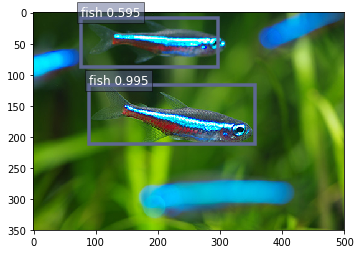

In [89]:
object_categories = ['fish']
# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
threshold = 0.2
 
# Visualize the detections.
visualize_detection('test2.jpg',object_categories, threshold)

In [32]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import boto3
import tempfile

In [92]:
def visualize_detection2(bucket_name,img_file, classes=[], thresh=0.6):
        """
        visualize detections in one image
        Parameters:
        ----------
        img : numpy.array
            image, in bgr format
        dets : numpy.array
            ssd detections, numpy.array([[id, score, x1, y1, x2, y2]...])
            each row is one object
        classes : tuple or list of str
            class names
        thresh : float
            score threshold
        """
        file_name = img_file
        import matplotlib.image as mpimg
        s3 = boto3.resource('s3', region_name='ap-northeast-1')#region_nameは自分のところに
        bucket = s3.Bucket(bucket_name)
        object = bucket.Object(file_name)
        tmp = tempfile.NamedTemporaryFile()

        with open(tmp.name, 'r+b') as f:
            object.download_fileobj(f)
            img=mpimg.imread(tmp.name)

            with open(tmp.name, 'rb') as image:
                f = image.read()
                b = bytearray(f)
                ne = open('n.txt','wb')
                ne.write(b)

        import json
        object_detector.content_type = 'image/jpeg'
        results = object_detector.predict(b)
        dets = json.loads(results)
        
        
        import random
        

        plt.imshow(img)
        height = img.shape[0]
        width = img.shape[1]
        colors = dict()
        for det in dets['predictions'][0]['prediction']:
            (klass, score, x0, y0, x1, y1) = det
            if score < thresh:
                continue
            cls_id = int(klass)
            if cls_id not in colors:
                colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0 * width)
            ymin = int(y0 * height)
            xmax = int(x1 * width)
            ymax = int(y1 * height)
            rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 edgecolor=colors[cls_id],
                                 linewidth=3.5)
            plt.gca().add_patch(rect)
            class_name = str(cls_id)
            if classes and len(classes) > cls_id:
                class_name = classes[cls_id]
            plt.gca().text(xmin, ymin - 2,
                            '{:s} {:.3f}'.format(class_name, score),
                            bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                                    fontsize=12, color='white')
        plt.show()

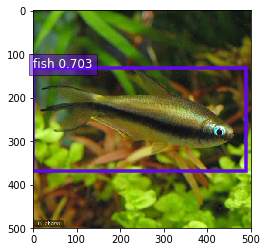

In [93]:
object_categories = ['fish']
# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
threshold = 0.4
visualize_detection2(bucket_name = 'sagemaker-fish-detection',img_file = 'test/0005.jpg' ,classes=object_categories, thresh=threshold)

test/0001.jpg


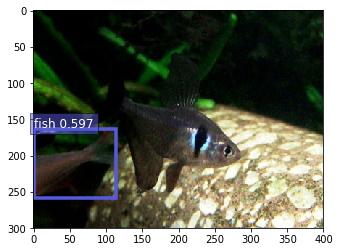

test/0002.jpg


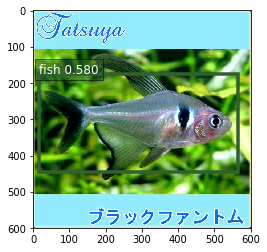

test/0003.jpg


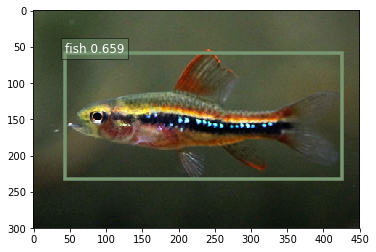

test/0004.jpg


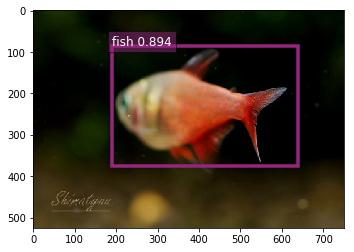

test/0005.jpg


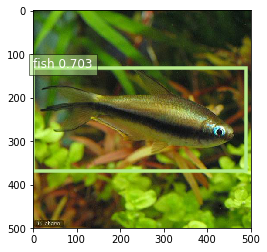

test/0006.jpg


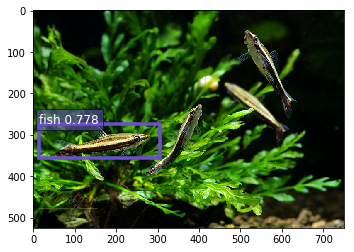

test/0007.jpg


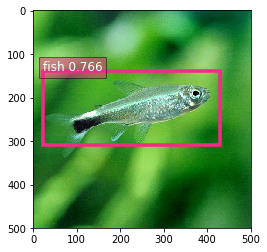

test/0008.jpg


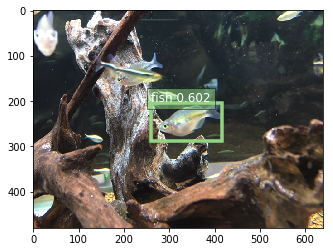

test/0009.jpg


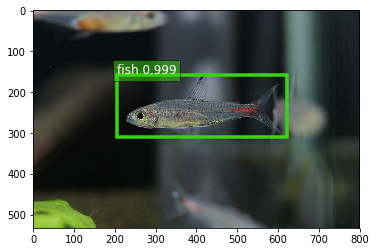

test/0010.jpg


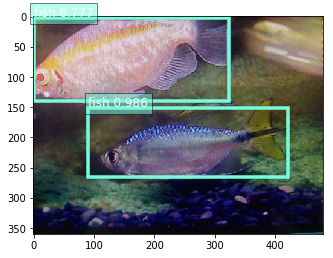

test/0011.jpg


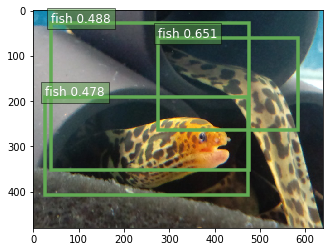

test/0012.jpg


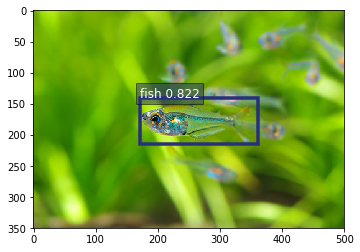

test/0013.jpg


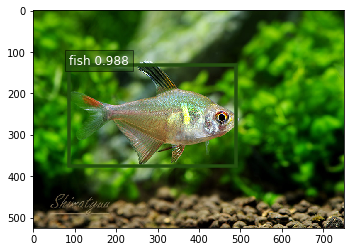

test/0014.jpg


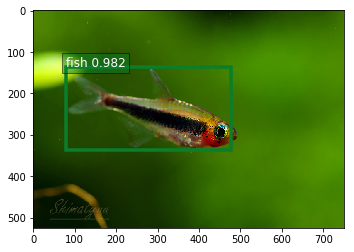

test/0015.jpg


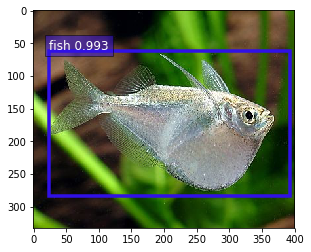

test/0016.jpg


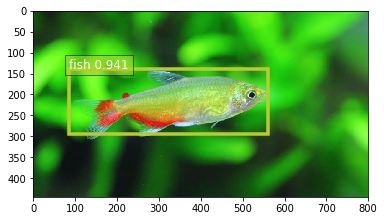

test/0017.jpg


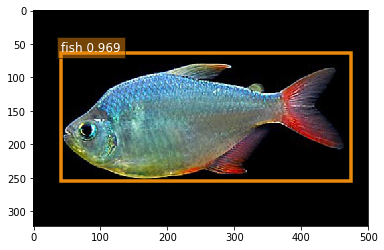

test/0018.jpg


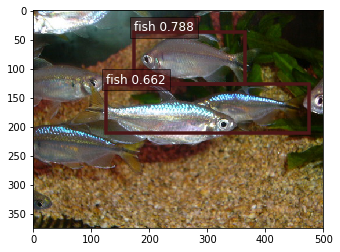

test/0019.jpg


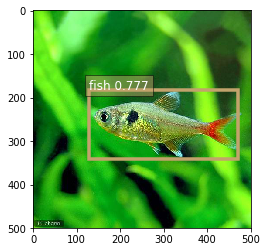

test/0020.jpg


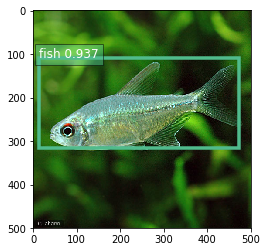

test/0021.jpg


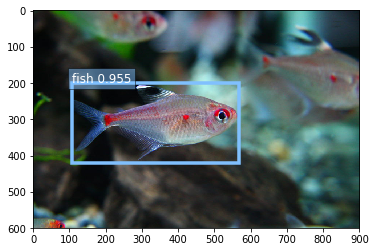

test/0022.jpg


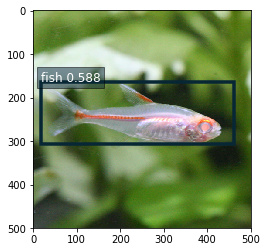

test/0023.jpg


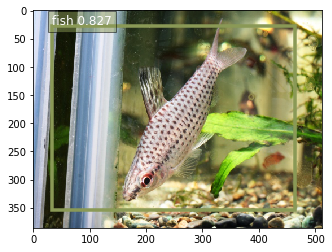

test/0024.jpg


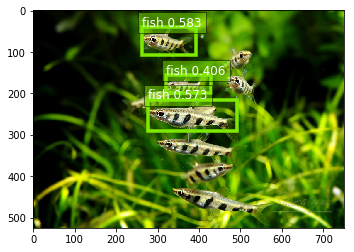

test/0025.jpg


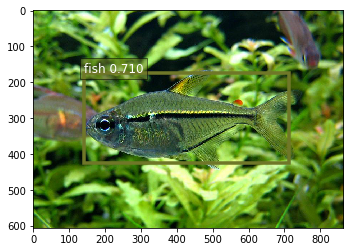

test/0026.jpg


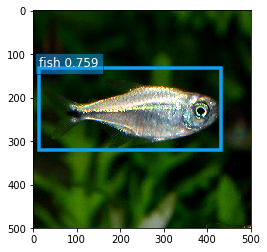

test/0027.jpg


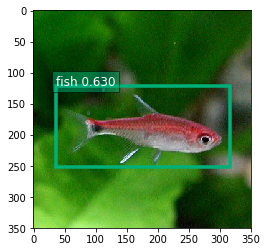

test/0028.jpg


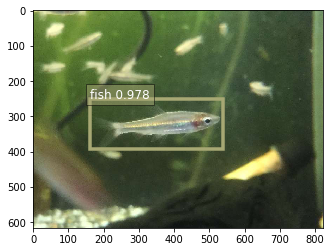

test/0029.jpg


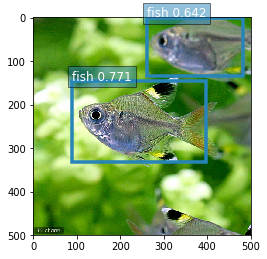

test/0030.jpg


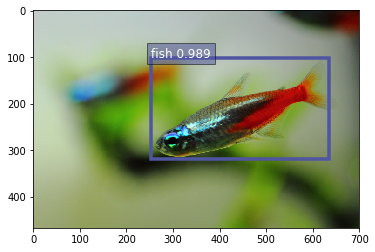

test/0031.jpg


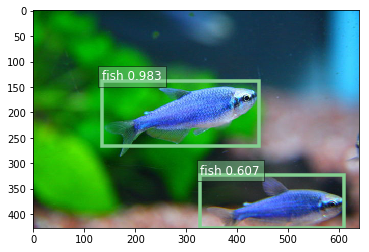

test/0032.jpg


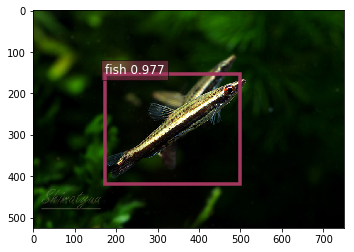

test/0033.jpg


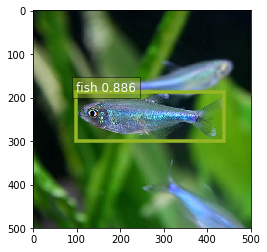

test/0034.jpg


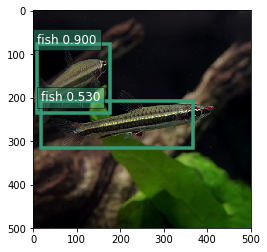

test/0035.jpg


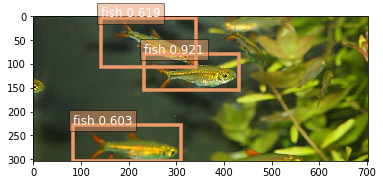

test/0036.jpg


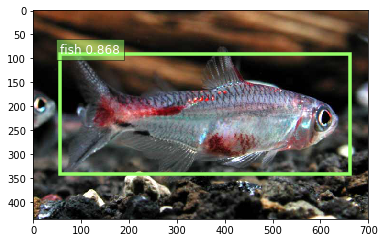

test/0037.jpg


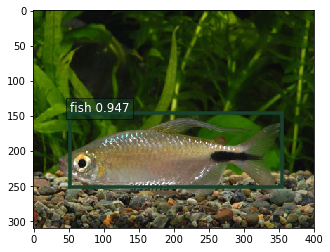

test/0038.jpg


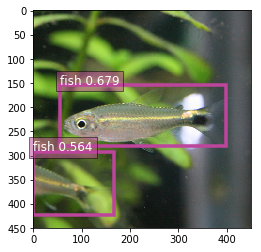

test/0039.jpg


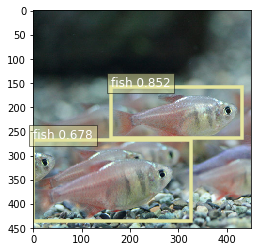

test/0040.jpg


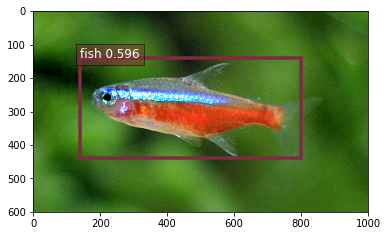

test/0041.jpg


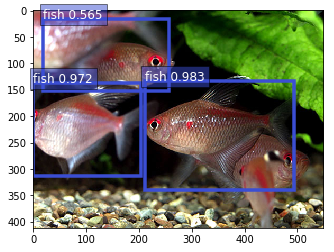

test/0042.jpg


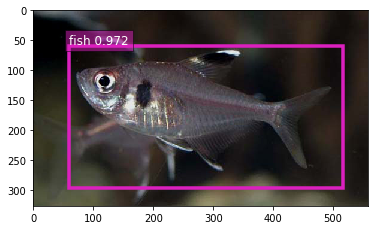

test/0043.jpg


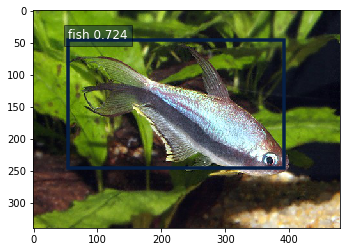

test/0044.jpg


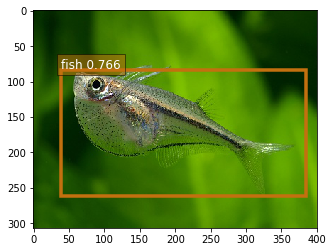

test/0045.jpg


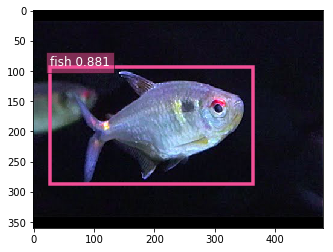

test/0046.jpg


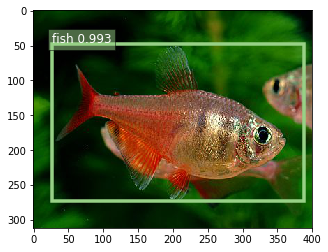

test/0047.jpg


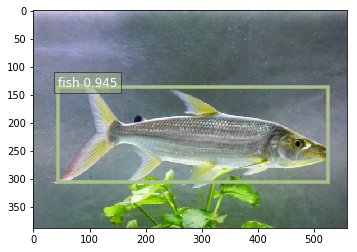

test/0048.jpg


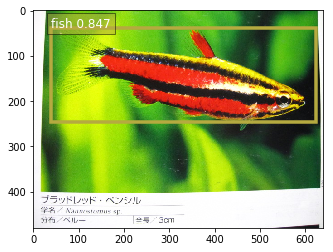

test/0049.jpg


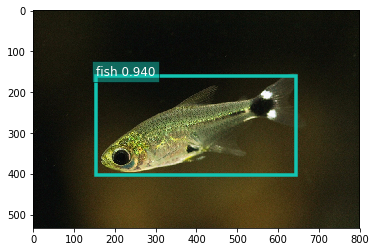

test/0050.jpg


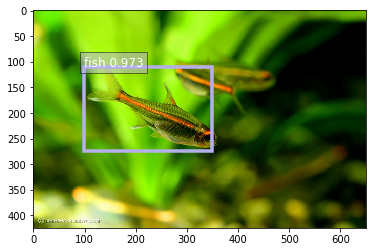

In [151]:
#デモ用
object_categories = ['fish']
# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
threshold = 0.4
 
# Visualize the detections of some test images
ls=['test/{0:04d}.jpg'.format(i+1) for i in range(50)]
for i in ls:
    print(i)
    visualize_detection2('sagemaker-fish-detection',i ,object_categories, threshold)

In [123]:
'''def visualize_detection3(bucket_name,img_file, classes=[], thresh=0.6):
        """
        visualize detections in one image
        Parameters:
        ----------
        img : numpy.array
            image, in bgr format
        dets : numpy.array
            ssd detections, numpy.array([[id, score, x1, y1, x2, y2]...])
            each row is one object
        classes : tuple or list of str
            class names
        thresh : float
            score threshold
        """
        file_name = img_file
        import matplotlib.image as mpimg
        import cv2
        s3 = boto3.resource('s3', region_name='ap-northeast-1')#region_nameは自分のところに
        bucket = s3.Bucket(bucket_name)
        object = bucket.Object(file_name)
        tmp = tempfile.NamedTemporaryFile()

        with open(tmp.name, 'r+b') as f:
            object.download_fileobj(f)
            img=cv2.imread(tmp.name)

            with open(tmp.name, 'rb') as image:
                f = image.read()
                b = bytearray(f)
                ne = open('n.txt','wb')
                ne.write(b)

        import json
        object_detector.content_type = 'image/jpeg'
        results = object_detector.predict(b)
        dets = json.loads(results)
        
 
        import random
        import matplotlib.pyplot as plt
        n=1
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        height = img.shape[0]
        width = img.shape[1]
        colors = dict()
        for det in dets['predictions'][0]['prediction']:
            (klass, score, x0, y0, x1, y1) = det
            if score < thresh:
                continue
            cls_id = int(klass)
            if cls_id not in colors:
                colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0 * width)
            ymin = int(y0 * height)
            xmax = int(x1 * width)
            ymax = int(y1 * height)
            #拡大
            im=img[ymin:ymax,xmin:xmax]
            #保存''
            na='result/fish{}.png'.format(n)
            cv2.imwrite(na,im)
            #表示
            plt.subplot(1,2,n)
            n+=1
            plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
            if n>2:
                break
        plt.show()'''

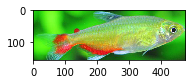

In [130]:
'''object_categories = ['fish']
# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
threshold = 0.4
 
# Visualize the detections.
ls=['test/{0:04d}.jpg'.format(i+1) for i in range(100)]
visualize_detection3('sagemaker-fish-detection',ls[15] ,object_categories, threshold)

import os
for i in os.listdir('result'):
    if i[-3:]=='png':
        import boto3

        s3 = boto3.resource('s3')

        data = open('result/'+i, 'rb')
        s3.Bucket('sagemaker-fish-output').put_object(Key=i, Body=data)'''

In [144]:
#デモ用
def visualize_detection3(bucket_name,img_file, classes=[], thresh=0.6):
        """
        visualize detections in one image
        Parameters:
        ----------
        img : numpy.array
            image, in bgr format
        dets : numpy.array
            ssd detections, numpy.array([[id, score, x1, y1, x2, y2]...])
            each row is one object
        classes : tuple or list of str
            class names
        thresh : float
            score threshold
        """
        file_name = img_file
        import matplotlib.image as mpimg
        import cv2
        s3 = boto3.resource('s3', region_name='ap-northeast-1')#region_nameは自分のところに
        bucket = s3.Bucket(bucket_name)
        object = bucket.Object(file_name)
        tmp = tempfile.NamedTemporaryFile()

        with open(tmp.name, 'r+b') as f:
            object.download_fileobj(f)
            img=cv2.imread(tmp.name)

            with open(tmp.name, 'rb') as image:
                f = image.read()
                b = bytearray(f)
                ne = open('n.txt','wb')
                ne.write(b)

        import json
        object_detector.content_type = 'image/jpeg'
        results = object_detector.predict(b)
        dets = json.loads(results)
        
 
        import random
        import matplotlib.pyplot as plt
        plt.subplot(2,2,1)
        plt.imshow(img)
        n=1
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        height = img.shape[0]
        width = img.shape[1]
        colors = dict()
        for det in dets['predictions'][0]['prediction']:
            (klass, score, x0, y0, x1, y1) = det
            if score < thresh:
                continue
            cls_id = int(klass)
            if cls_id not in colors:
                colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0 * width)
            ymin = int(y0 * height)
            xmax = int(x1 * width)
            ymax = int(y1 * height)
            rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 edgecolor=colors[cls_id],
                                 linewidth=3.5)
            plt.gca().add_patch(rect)
            class_name = str(cls_id)
            if classes and len(classes) > cls_id:
                class_name = classes[cls_id]
            plt.gca().text(xmin, ymin - 2,
                            '{:s} {:.3f}'.format(class_name, score),
                            bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                                    fontsize=12, color='white')
            
            #切り取り
            im=img[ymin:ymax,xmin:xmax]
            #save in the s3 bucket
            na='result/{}{}.jpeg'.format(img_file[-10:-5],n)
            cv2.imwrite(na,im)
            #表示
            plt.subplot(2,2,n+2)
            n+=1
            plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
            if n>2:
                break
        plt.show()

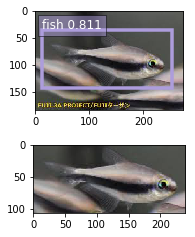

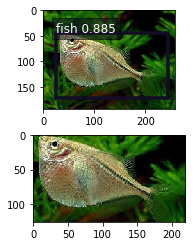

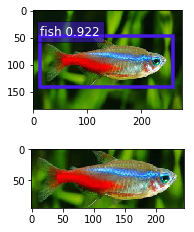

In [152]:
object_categories = ['fish']
# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
threshold = 0.4
 
# Visualize the detections.
ls2= ['エンペラーテトラ.jpeg','シルバーハチェット.jpeg','ネオンテトラ.jpeg']
for i in ls2:
    visualize_detection3('sagemaker-fish-detection','test2/'+i ,object_categories, threshold)
    
import os
for i in os.listdir('result'):
    if i[-4:]=='jpeg':
        import boto3

        s3 = boto3.resource('s3')

        data = open('result/'+i, 'rb')
        s3.Bucket('sagemaker-fish-output').put_object(Key=i, Body=data)